栈与队列
# 栈
栈（stack）是一种遵循先入后出逻辑的线性数据结构。

我们可以将栈类比为桌面上的一摞盘子，规定每次只能移动一个盘子，那么想取出底部的盘子，则需要先将上面的盘子依次移走。我们将盘子替换为各种类型的元素（如整数、字符、对象等），就得到了栈这种数据结构。

如图 5-1 所示，我们把堆叠元素的顶部称为“栈顶”，底部称为“栈底”。将把元素添加到栈顶的操作叫作“入栈”，删除栈顶元素的操作叫作“出栈”。
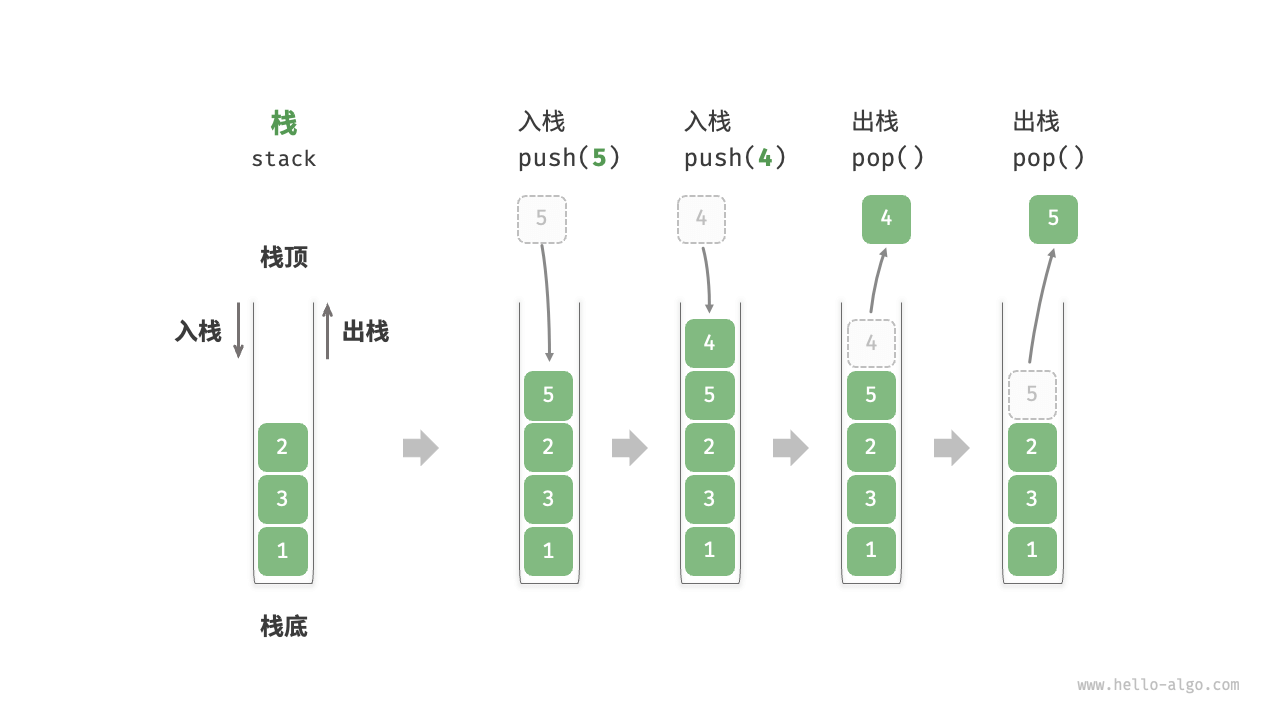
## 栈的常用操作

栈的常用操作如下表所示，具体的方法名需要根据所使用的编程语言来确定。在此，我们以常见的 `push()`、`pop()`、`peek()` 命名为例。

<p align="center"> 表 <id> &nbsp; 栈的操作效率 </p>

| 方法     | 描述                   | 时间复杂度 |
| -------- | ---------------------- | ---------- |
| `push()` | 元素入栈（添加至栈顶） | $O(1)$     |
| `pop()`  | 栈顶元素出栈           | $O(1)$     |
| `peek()` | 访问栈顶元素           | $O(1)$     |

通常情况下，我们可以直接使用编程语言内置的栈类。然而，某些语言可能没有专门提供栈类，这时我们可以将该语言的“数组”或“链表”当作栈来使用，并在程序逻辑上忽略与栈无关的操作。



In [ ]:
// 在go语言中推荐使用slice来当作栈使用
var stack []int

// 元素入栈
stack = append(stack,1)
stack = append(stack,2)
stack = append(stack,3)
stack = append(stack,5)
stack = append(stack,8)

// 元素出栈
pop := stack[len(stack)-1]
stack = stack[:len(stack)-1]

// 查看栈顶元素
top := stack[len(stack)-1]

// 获取栈的大小
size := len(stack)

// 判断是否为空
isEmpty := len(stack) == 0


## 栈的实现 
为了深入了解栈的运行机制，我们来尝试自己实现一个栈类。

栈遵循先入后出的原则，因此我们只能在栈顶添加或删除元素。然而，数组和链表都可以在任意位置添加和删除元素，**因此栈可以视为一种受限制的数组或链表**。换句话说，我们可以“屏蔽”数组或链表的部分无关操作，使其对外表现的逻辑符合栈的特性。

### 基于链表的实现
使用链表实现栈时，我们可以将链表的头节点视为栈顶，尾节点视为栈底。

如图 5-2 所示，对于入栈操作，我们只需将元素插入链表头部，这种节点插入方法被称为“头插法”。而对于出栈操作，只需将头节点从链表中删除即可。
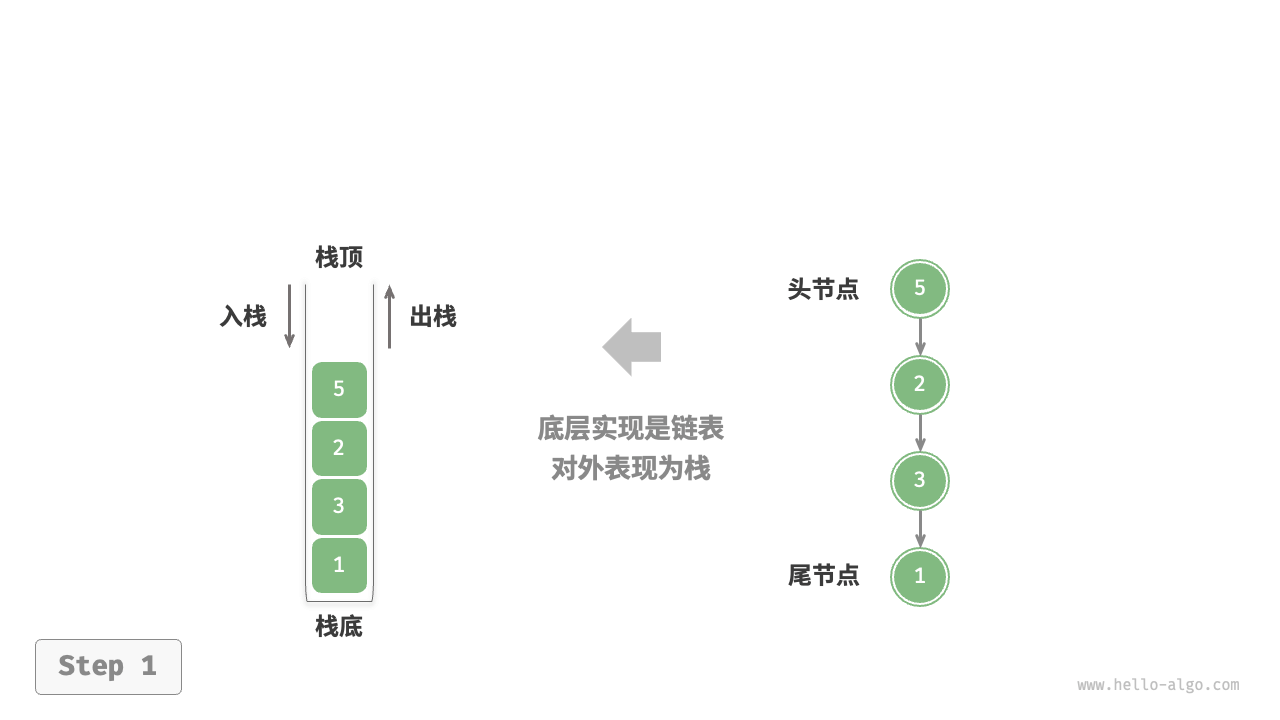


In [ ]:
// 基于链表实现栈
type linkedliststack struct{
	// 用内置包list来实现栈
	data *list.List
}

// 初始化栈
func NewLinkedListStack() *linkedliststack {
	return &linkedliststack{
		data: list.New(),
	}
}

// 入栈
func (s *linkedliststack) Push(val int) {
	s.data.PushBack(val)
}

// 出栈
func (s *linkedliststack) Pop() int {
	if s.data.Len() == 0 {
		panic("stack is empty")
	}
	element := s.data.Back()
	s.data.Remove(element)
	return element.Value.(int)
}

// 查看栈顶元素
func (s *linkedliststack) Top() int {
	if s.data.Len() == 0 {
		panic("stack is empty")
	}
	return s.data.Back().Value.(int)
}

// 获取栈的大小
func (s *linkedliststack) Size() int {
	return s.data.Len()
}

// 判断是否为空
func (s *linkedliststack) IsEmpty() bool {
	return s.data.Len() == 0
}


// 获取list用于打印
func (s *linkedliststack) tolist() *list.List {
	return s.data 
}

### 基于数组实现
使用数组实现栈时，我们可以将数组的尾部作为栈顶。如图 5-3 所示，入栈与出栈操作分别对应在**数组尾部添加元素与删除元素**，时间复杂度都为$O(1)$.
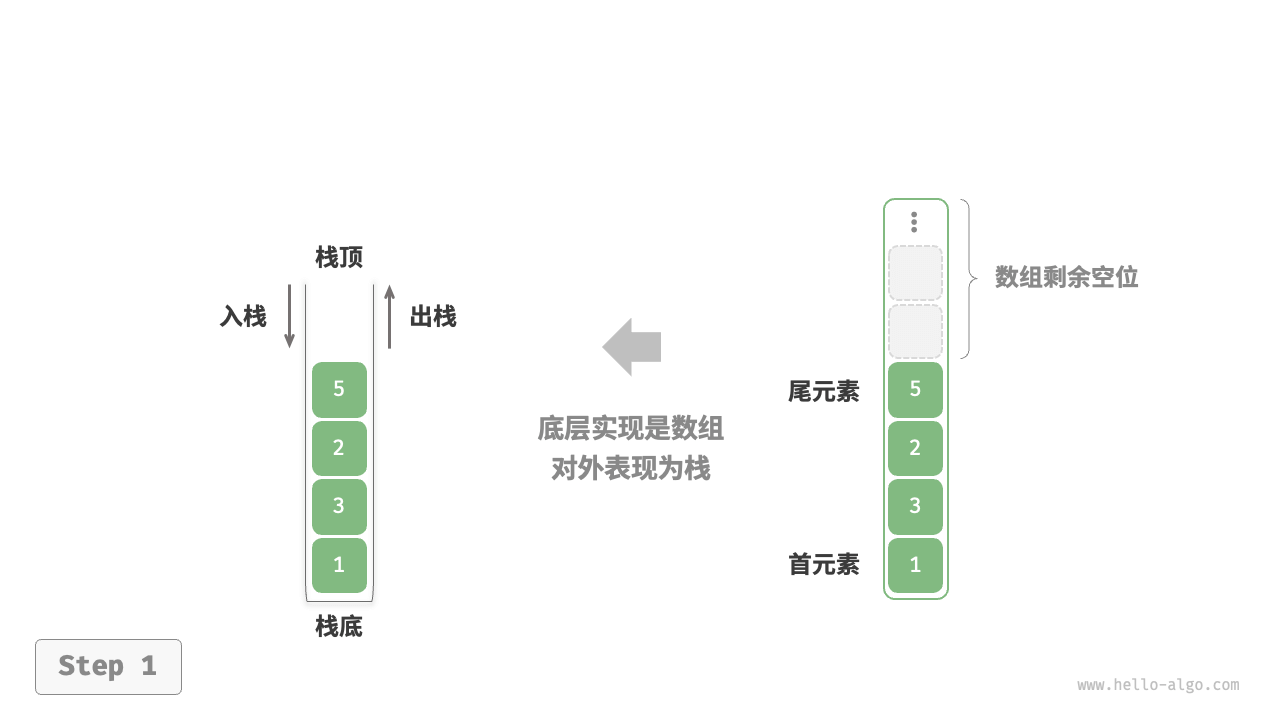
由于入栈的元素可能会源源不断地增加，因此我们可以使用动态数组，这样就无须自行处理数组扩容问题。

In [ ]:
// 基于数组实现的栈
type arraystcak struct{
	data []int
}

// 初始化栈
func Newarraystack() *arraystack{
	return &arraystack{
		data: make([]int,0,16),
	}
}

// 栈的长度
func (s *arraystack) Size() int {
	return len(s.data)
}

// 判断栈是否为空
func (s *arraystack) IsEmpty() bool {
	return len(s.data) == 0
}

// 入栈
func (s *arraystack) Push(val int) {
	s.data = append(s.data,val)
}

// 出栈
func (s *arraystack) Pop() int {
	if len(s.data) == 0 {
		panic("stack is empty")
	}
	val := s.data[len(s.data)-1]
	s.data = s.data[:len(s.data)-1]
	return val
}

// 查看栈顶元素
func (s *arraystack) Top() int {
	if len(s.data) == 0{
		panic("stack is empty")
	}
	val = s.data[len(s.data)-1]
	return val
}

// 获取slice用于打印
func (s *arraystack) toslice() []int{
	return s.data
}

// // 当执行 push 操作时，会调用 append(s.data, v) 向切片中添加元素：
// 当 ** 切片长度 len < 容量 cap** 时，append 会直接在底层数组的空闲
// 位置添加元素，不会扩容。
// 当切片长度 len == 容量 cap时，再执行 append 就会触发自动扩容：Go 
// 会创建一个新的、更大的底层数组，将原数组的元素复制到新数组中，然后将
// 新元素添加到新数组里，并更新切片的 len 和 cap（新容量通常是原容量的 
// 2 倍，具体扩容策略还会根据元素类型和数量微调）。
// 简言之，这段代码利用了 Go 切片自动扩容的特性，让基于切片实现的栈无
// 需手动管理容量，在元素数量超过当前容量时会自动 “扩容” 以容纳新元
// 素。

## 两种实现对比

**支持操作**

两种实现都支持栈定义中的各项操作。数组实现额外支持随机访问，但这已超出了栈的定义范畴，因此一般不会用到。

**时间效率**

在基于数组的实现中，入栈和出栈操作都在预先分配好的连续内存中进行，具有很好的缓存本地性，因此效率较高。然而，如果入栈时超出数组容量，会触发扩容机制，导致该次入栈操作的时间复杂度变为 $O(n)$ 。

在基于链表的实现中，链表的扩容非常灵活，不存在上述数组扩容时效率降低的问题。但是，入栈操作需要初始化节点对象并修改指针，因此效率相对较低。不过，如果入栈元素本身就是节点对象，那么可以省去初始化步骤，从而提高效率。

综上所述，当入栈与出栈操作的元素是基本数据类型时，例如 `int` 或 `double` ，我们可以得出以下结论。

- 基于数组实现的栈在触发扩容时效率会降低，但由于扩容是低频操作，因此平均效率更高。
- 基于链表实现的栈可以提供更加稳定的效率表现。

**空间效率**

在初始化列表时，系统会为列表分配“初始容量”，该容量可能超出实际需求；并且，扩容机制通常是按照特定倍率（例如 2 倍）进行扩容的，扩容后的容量也可能超出实际需求。因此，**基于数组实现的栈可能造成一定的空间浪费**。

然而，由于链表节点需要额外存储指针，**因此链表节点占用的空间相对较大**。

综上，我们不能简单地确定哪种实现更加节省内存，需要针对具体情况进行分析。

## 栈的典型应用

- **浏览器中的后退与前进、软件中的撤销与反撤销**。每当我们打开新的网页，浏览器就会对上一个网页执行入栈，这样我们就可以通过后退操作回到上一个网页。后退操作实际上是在执行出栈。如果要同时支持后退和前进，那么需要两个栈来配合实现。
- **程序内存管理**。每次调用函数时，系统都会在栈顶添加一个栈帧，用于记录函数的上下文信息。在递归函数中，向下递推阶段会不断执行入栈操作，而向上回溯阶段则会不断执行出栈操作。


# 队列
队列（queue）是一种遵循先入先出规则的线性数据结构。顾名思义，队列模拟了排队现象，即新来的人不断加入队列尾部，而位于队列头部的人逐个离开。

如图 5-4 所示，我们将队列头部称为“队首”，尾部称为“队尾”，将把元素加入队尾的操作称为“入队”，删除队首元素的操作称为“出队”。
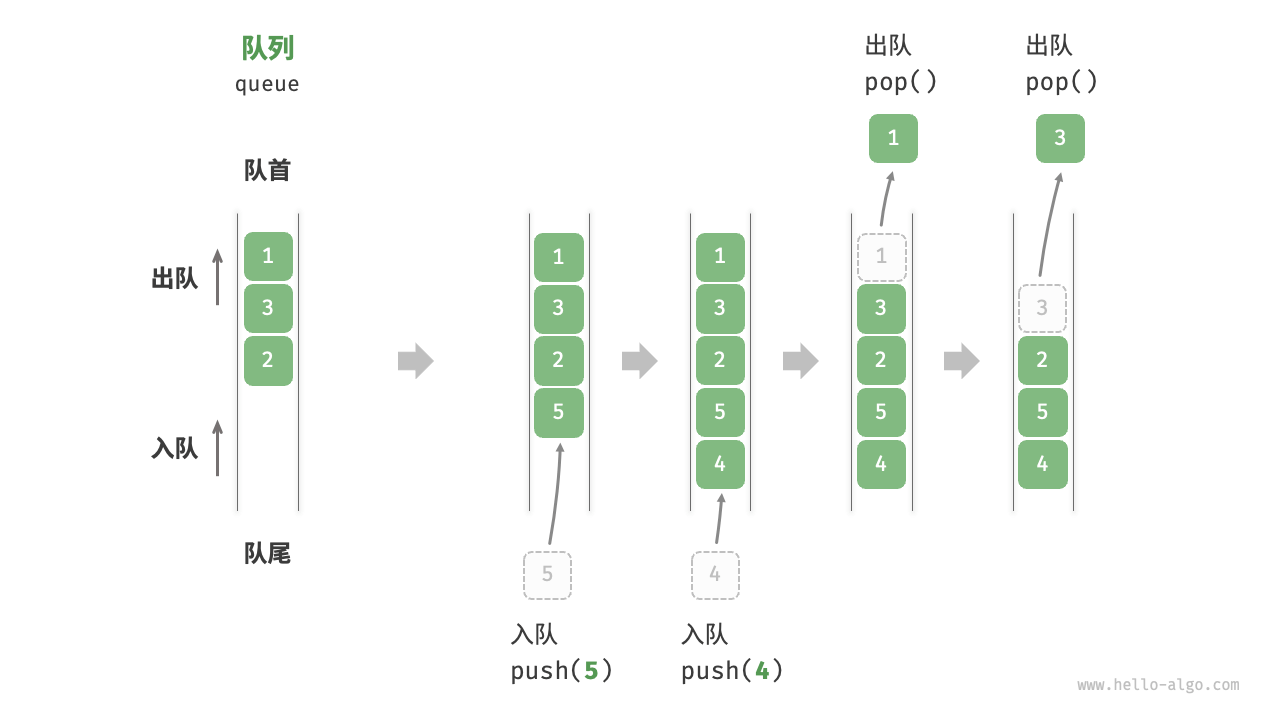

## 队列常用操作
队列的常见操作如下表所示。需要注意的是，不同编程语言的方法名称可能会有所不同。我们在此采用与栈相同的方法命名。

<p align="center"> 表 <id> &nbsp; 队列操作效率 </p>

| 方法名   | 描述                         | 时间复杂度 |
| -------- | ---------------------------- | ---------- |
| `push()` | 元素入队，即将元素添加至队尾 | $O(1)$     |
| `pop()`  | 队首元素出队                 | $O(1)$     |
| `peek()` | 访问队首元素                 | $O(1)$     |

我们可以直接使用编程语言中现成的队列类：

In [1]:
// 初始化队列
// 在Go语言中将list作为队列来使用
queue := list.New()

// 元素入队
queue.PushBack(1)
queue.PushBack(3)
queue.PushBack(5)

// 元素出队
frontElement := queue.Front()
queue.Remove(frontElement)
value := frontElement.Value.(int)

// 查看队首元素
frontValue := queue.Front().Value.(int)

// 获取队列大小
size := queue.Len()

// 判断队列是否为空
isEmpty := queue.Len() == 0

Cell[1]: Line 3 
 /tmp/gonb_7e386a6e/main.go:5:1: expected declaration, found queue
 

// 初始化队列
// 在Go语言中将list作为队列来使用
 queue := list.New()
 
// 元素入队

ERROR: parsing go files in TempDir "/tmp/gonb_7e386a6e": /tmp/gonb_7e386a6e/main.go:5:1: expected declaration, found queue

## 队列实现
为了实现队列，我们需要一种数据结构，可以在一端添加元素，并在另一端删除元素，链表和数组都符合要求。

### 1.基于链表的实现
如图 5-5 所示，我们可以将链表的“头节点”和“尾节点”分别视为“队首”和“队尾”，规定队尾仅可添加节点，队首仅可删除节点。
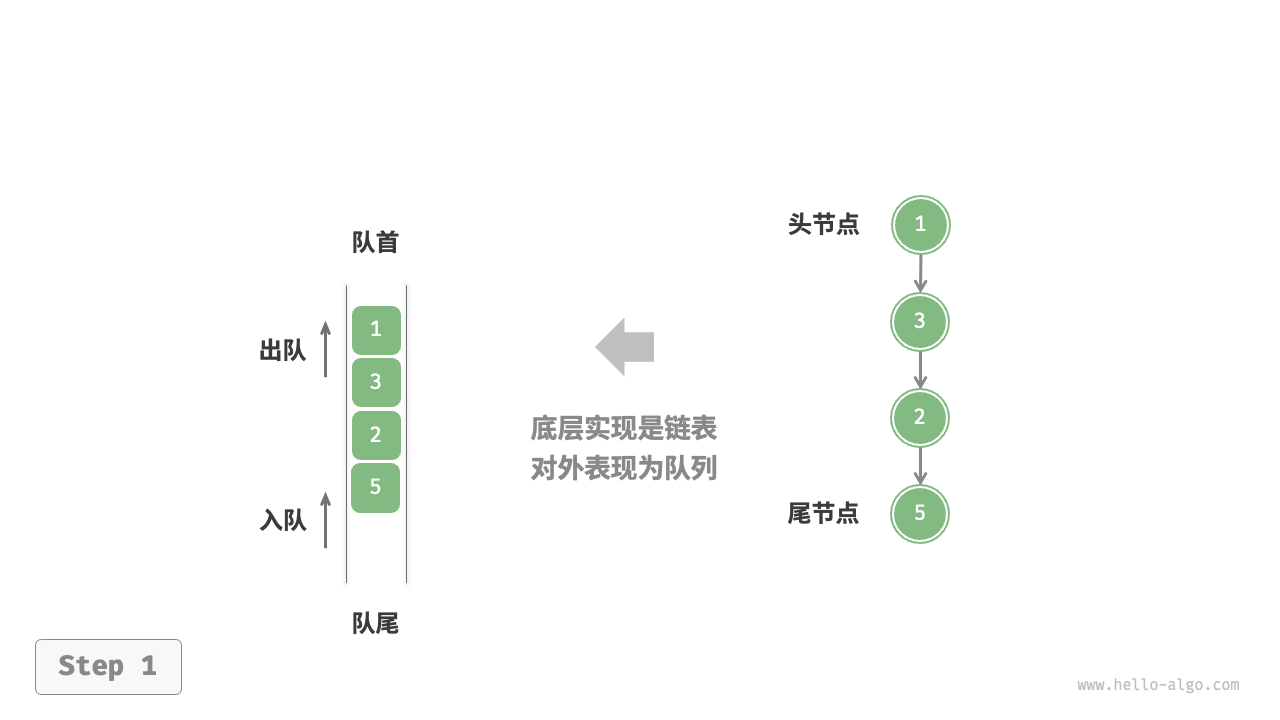

以下是用链表实现队列的代码：

In [ ]:
// 基于链表实现的队列
type linkedlistqueue struct{
	// 用内置包来实现队列
	data *list.List
}

// 初始化队列
func NewLinkedListQueue() *linkedlistqueue {
	return &linkedlistqueue{
		data: list.New(),
	}
}

// 入队
func (q *linkedlistqueue) push(val int) {
	q.data.PushBack(val)
}

// 出队
func (q *linkedlistqueue) pop() int{
	if q.data.Len() == 0 {
		panic("queue is empty")
	}
	element := q.data.Front()
	q.data.Remove(element)
	return element.Value.(int)
}

// 查看队首元素
func (q *linkedlistqueue) front() int {
	if q.data.Len() == 0 {
		panic("queue is empty")
	}
	return q.data.Front().Value.(int)
}

// 获取队列大小
func (q *linkedlistqueue) size() int {
	return q.data.Len()
}

// 判断队列是否为空
func (q *linkedlistqueue) isEmpty() bool {
	return q.data.Len() == 0
}

// 获取list用于打印
func (q *linkedlistqueue) tolist() *list.List {
	return q.data 
}

### 2.基于数组实现
在数组中删除首元素的时间复杂度为 $O(n)$ ，这会导致出队操作效率较低。然而，我们可以采用以下巧妙方法来避免这个问题。

我们可以使用一个变量 `front` 指向队首元素的索引，并维护一个变量 `size` 用于记录队列长度。定义 `rear = front + size` ，这个公式计算出的 `rear` 指向队尾元素之后的下一个位置。

基于此设计，**数组中包含元素的有效区间为 `[front, rear - 1]`**，各种操作的实现方法如下图所示。

- 入队操作：将输入元素赋值给 `rear` 索引处，并将 `size` 增加 1 。
- 出队操作：只需将 `front` 增加 1 ，并将 `size` 减少 1 。

可以看到，入队和出队操作都只需进行一次操作，时间复杂度均为 $O(1)$ 。
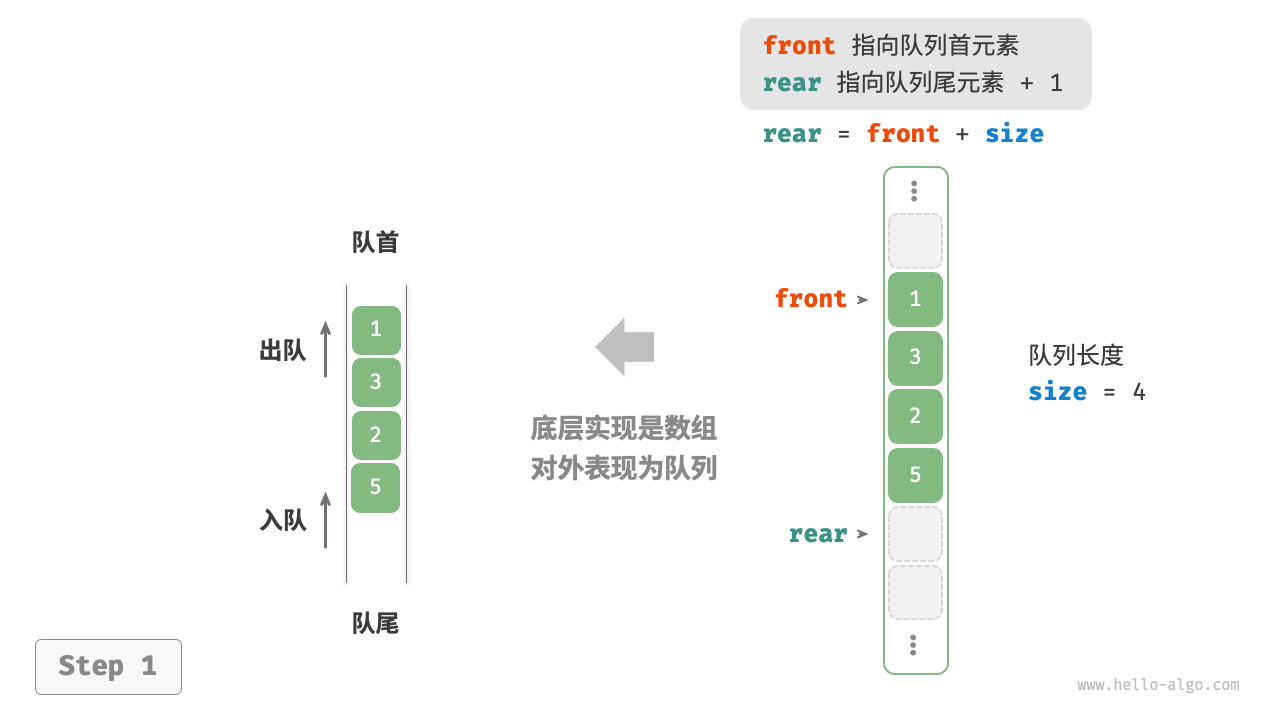

你可能会发现一个问题：在不断进行入队和出队的过程中，front 和 rear 都在向右移动，当它们到达数组尾部时就无法继续移动了。为了解决此问题，我们可以将数组视为首尾相接的“环形数组”。

对于环形数组，我们需要让 front 或 rear 在越过数组尾部时，直接回到数组头部继续遍历。这种周期性规律可以通过“取余操作”来实现，代码如下所示：

In [ ]:
// 基于环形数组实现队列
type arrayqueue struct{
	nums []int // 用于存储队列元素的数组
	front int // 队首指针，指向队首元素
	quesize int // 队列长度 
	quecapcaity int // 队列容量(即最大容纳元素数量)
}

// 初始化队列
func NewArrayQueue(capacity int) *arrayqueue {
	return &arrayqueue{
		nums: make([]int,capacity),
		front: 0,
		quesize: 0,
		quecapcaity: capacity,
	}
}

// 入队
func (q *arrayqueue) push(val int) {
	if q.quesize == q.quecapcaity {
		panic("queue is full")
	}
	rear := (q.front + q.quesize) % q.quecapcaity
	q.nums[rear] = val
	q.quesize++
}

// 出队
func (q *arrayqueue) pop() int {
	if q.quesize == 0 {
		panic("queue is empty")
	}
	val := q.nums[q.front]
	q.front = (q.front + 1) % q.quecapcaity
	q.quesize--
	return val
}

// 查看队首元素
func (q *arrayqueue) peek() int {
	if q.quesize == 0 {
		panic("queue is empty")
	}
	return q.nums[q.front]
}

// 获取队列大小
func (q *arrayqueue) size() int {
	return q.quesize
}

// 判断队列是否为空
func (q *arrayqueue) isEmpty() bool {
	return q.quesize == 0
}

// 获取slice用于打印
func (q *arrayqueue) toslice() []int {
	result := make([]int,0,q.quesize)
	for i := 0; i < q.quesize; i++ {
		index := (q.front + i) % q.quecapcaity
		result = append(result,q.nums[index])
	}
	return result
}

以上实现的队列仍然具有局限性：其长度不可变。然而，这个问题不难解决，我们可以将数组替换为动态数组，从而引入扩容机制。有兴趣的读者可以尝试自行实现。

两种实现的对比结论与栈一致，在此不再赘述。

## 队列典型应用

- **淘宝订单**。购物者下单后，订单将加入队列中，系统随后会根据顺序处理队列中的订单。在双十一期间，短时间内会产生海量订单，高并发成为工程师们需要重点攻克的问题。
- **各类待办事项**。任何需要实现“先来后到”功能的场景，例如打印机的任务队列、餐厅的出餐队列等，队列在这些场景中可以有效地维护处理顺序。

# 双向队列

在队列中，我们仅能删除头部元素或在尾部添加元素。如图 5-7 所示，双向队列（double-ended queue）提供了更高的灵活性，允许在头部和尾部执行元素的添加或删除操作。
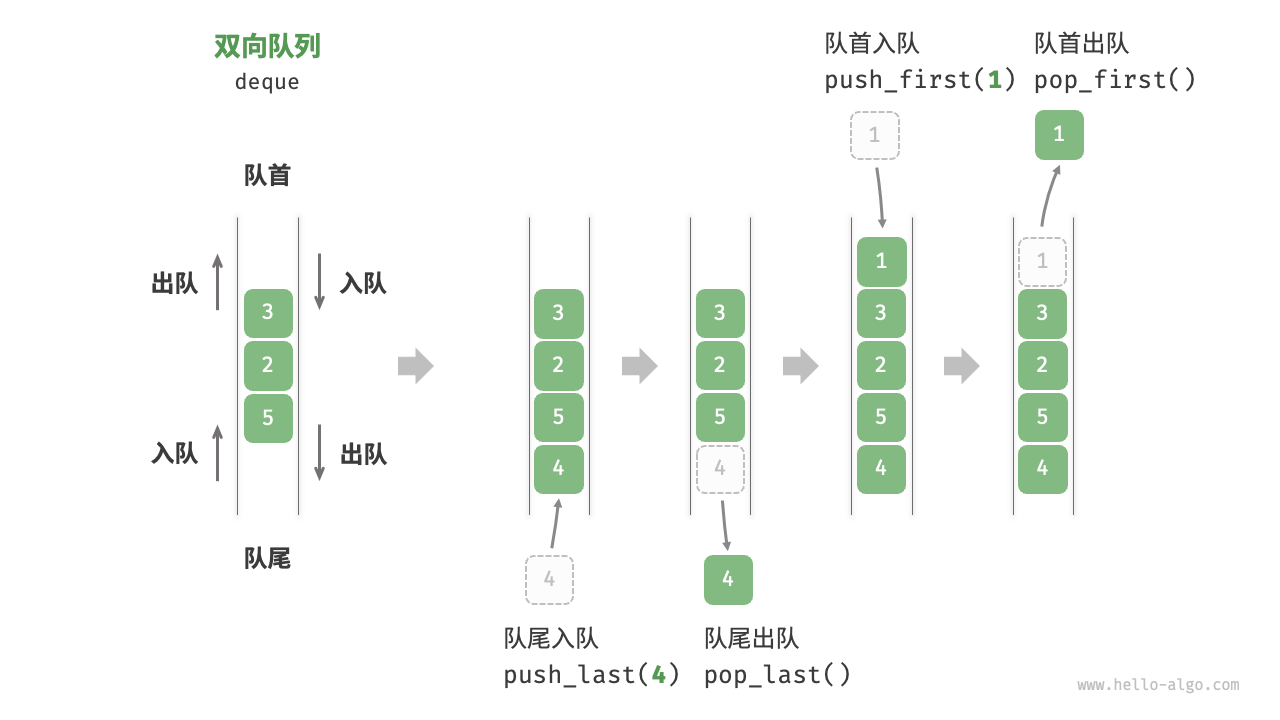

## 双向队列常用操作
双向队列的常用操作如下表所示，具体的方法名称需要根据所使用的编程语言来确定。

<p align="center"> 表 <id> &nbsp; 双向队列操作效率 </p>

| 方法名         | 描述             | 时间复杂度 |
| -------------- | ---------------- | ---------- |
| `push_first()` | 将元素添加至队首 | $O(1)$     |
| `push_last()`  | 将元素添加至队尾 | $O(1)$     |
| `pop_first()`  | 删除队首元素     | $O(1)$     |
| `pop_last()`   | 删除队尾元素     | $O(1)$     |
| `peek_first()` | 访问队首元素     | $O(1)$     |
| `peek_last()`  | 访问队尾元素     | $O(1)$     |

同样地，我们可以直接使用编程语言中已实现的双向队列类：


In [ ]:
/* 初始化双向队列 */
// 在 Go 中，将 list 作为双向队列使用
deque := list.New()

/* 元素入队 */
deque.PushBack(2)      // 添加至队尾
deque.PushBack(5)
deque.PushBack(4)
deque.PushFront(3)     // 添加至队首
deque.PushFront(1)

/* 访问元素 */
front := deque.Front() // 队首元素
rear := deque.Back()   // 队尾元素

/* 元素出队 */
deque.Remove(front)    // 队首元素出队
deque.Remove(rear)     // 队尾元素出队

/* 获取双向队列的长度 */
size := deque.Len()

/* 判断双向队列是否为空 */
isEmpty := deque.Len() == 0

## 双向队列实现
双向队列的实现与队列类似，可以选择链表或数组作为底层数据结构。

1.   基于双向链表的实现
回顾上一节内容，我们使用普通单向链表来实现队列，因为它可以方便地删除头节点（对应出队操作）和在尾节点后添加新节点（对应入队操作）。

对于双向队列而言，头部和尾部都可以执行入队和出队操作。换句话说，双向队列需要实现另一个对称方向的操作。为此，我们采用“双向链表”作为双向队列的底层数据结构。

如图 5-8 所示，我们将双向链表的头节点和尾节点视为双向队列的队首和队尾，同时实现在两端添加和删除节点的功能。
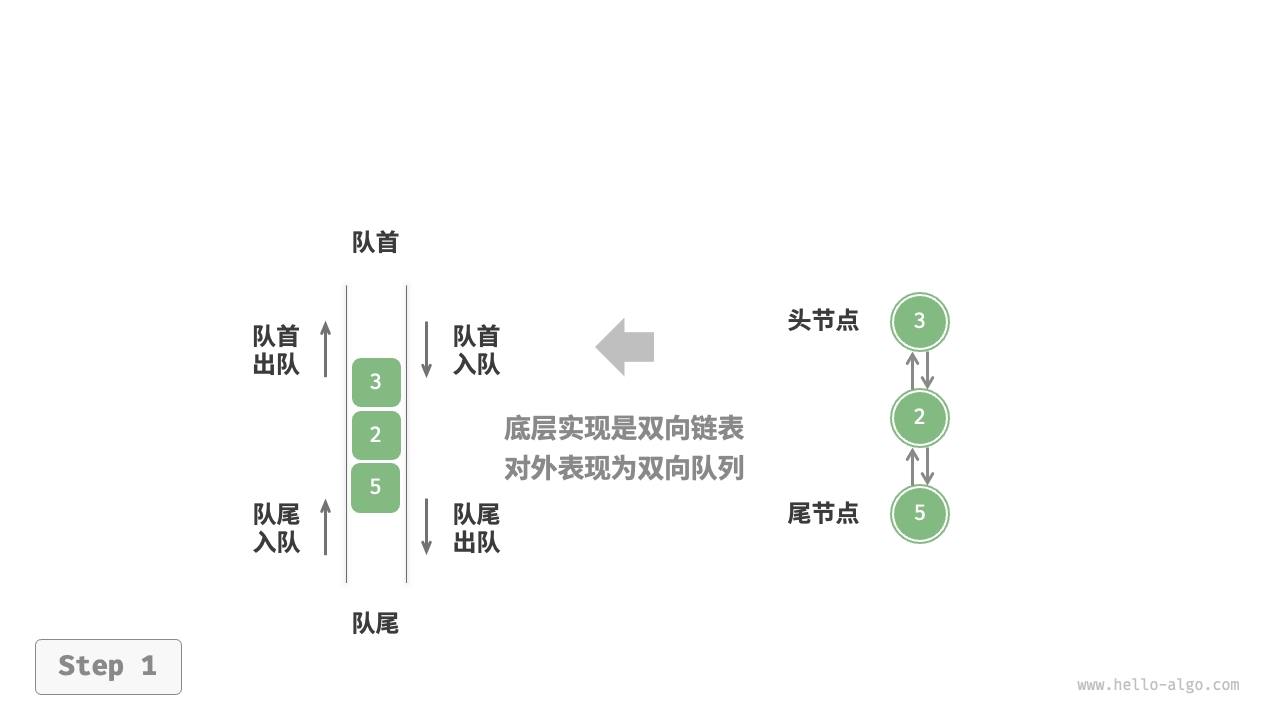

In [ ]:
// 基于双向链表来实现的双向队列
type linkeedlistdeque struct{
	// 使用内置包list
	data *list.List
}

// 初始化双向队列
func NewLinkedListDeque() *linkeedlistdeque {
	return &linkeedlistdeque{
		data: list.New(),
	}
}

// 队首入队
func (d *linkeedlistdeque) PushFront(val int) {
	d.data.PushFront(val)
}

// 队尾入队
func (d *linkeedlistdeque) PushBack(val int) {
	d.data.PushBack(val)
}

// 队首出队
func (d *linkeedlistdeque) PopFront() int {
	if d.data.Len() == 0 {
		panic("deque is empty")
	}
	element := d.data.Front()
	d.data.Remove(element)
	return element.Value.(int)
}

// 队尾出队
func (d *linkeedlistdeque) PopBack() int {
	if d.data.Len() == 0 {
		panic("deque is empty")
	}
	element := d.data.Back()
	d.data.Remove(element)
	return element.Value.(int)
}

// 查看队首元素
func (d *linkeedlistdeque) Front() int {
	if d.data.Len() == 0 {
		panic("deque is empty")
	}
	return d.data.Front().Value.(int)
}

// 查看队尾元素
func (d *linkeedlistdeque) Back() int {
	if d.data.Len() == 0 {
		panic("deque is empty")
	}
	return d.data.Back().Value.(int)
}

// 获取双向队列大小
func (d *linkeedlistdeque) Size() int {
	return d.data.Len()
}

// 判断双向队列是否为空
func (d *linkeedlistdeque) IsEmpty() bool {
	return d.data.Len() == 0
}

// 获取list用于打印
func (d *linkeedlistdeque) tolist() *list.List {
	return d.data 
}

2. 基于数组的实现
如图所示，与基于数组实现队列类似，我们也可以使用环形数组来实现双向队列
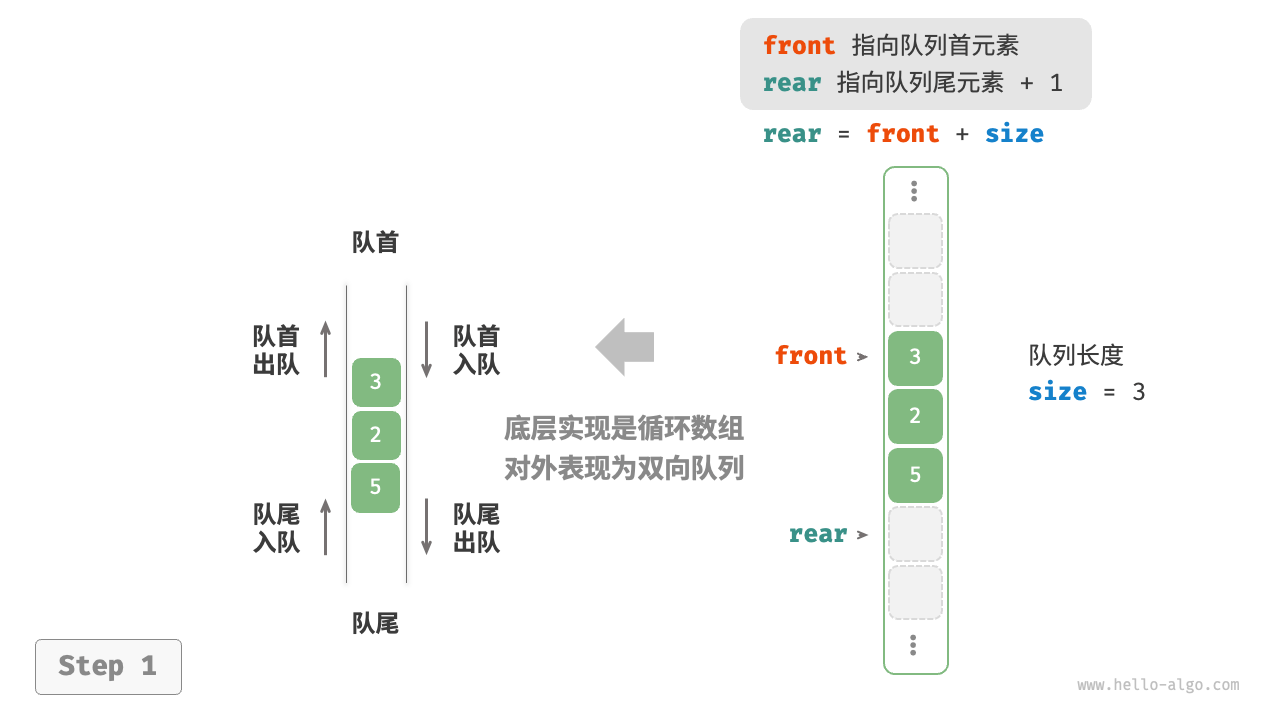
在队列的实现基础上，我们只需要增加“队首入队”和“队尾出队”的方法：


In [ ]:
/* 基于环形数组实现的双向队列 */
type arrayDeque struct {
    nums        []int // 用于存储双向队列元素的数组
    front       int   // 队首指针，指向队首元素
    queSize     int   // 双向队列长度
    queCapacity int   // 队列容量（即最大容纳元素数量）
}

/* 初始化队列 */
func newArrayDeque(queCapacity int) *arrayDeque {
    return &arrayDeque{
        nums:        make([]int, queCapacity),
        queCapacity: queCapacity,
        front:       0,
        queSize:     0,
    }
}

/* 获取双向队列的长度 */
func (q *arrayDeque) size() int {
    return q.queSize
}

/* 判断双向队列是否为空 */
func (q *arrayDeque) isEmpty() bool {
    return q.queSize == 0
}

/* 计算环形数组索引 */
func (q *arrayDeque) index(i int) int {
    // 通过取余操作实现数组首尾相连
    // 当 i 越过数组尾部后，回到头部
    // 当 i 越过数组头部后，回到尾部
    return (i + q.queCapacity) % q.queCapacity
}

/* 队首入队 */
func (q *arrayDeque) pushFirst(num int) {
    if q.queSize == q.queCapacity {
        fmt.Println("双向队列已满")
        return
    }
    // 队首指针向左移动一位
    // 通过取余操作实现 front 越过数组头部后回到尾部
    q.front = q.index(q.front - 1)
    // 将 num 添加至队首
    q.nums[q.front] = num
    q.queSize++
}

/* 队尾入队 */
func (q *arrayDeque) pushLast(num int) {
    if q.queSize == q.queCapacity {
        fmt.Println("双向队列已满")
        return
    }
    // 计算队尾指针，指向队尾索引 + 1
    rear := q.index(q.front + q.queSize)
    // 将 num 添加至队尾
    q.nums[rear] = num
    q.queSize++
}

/* 队首出队 */
func (q *arrayDeque) popFirst() any {
    num := q.peekFirst()
    if num == nil {
        return nil
    }
    // 队首指针向后移动一位
    q.front = q.index(q.front + 1)
    q.queSize--
    return num
}

/* 队尾出队 */
func (q *arrayDeque) popLast() any {
    num := q.peekLast()
    if num == nil {
        return nil
    }
    q.queSize--
    return num
}

/* 访问队首元素 */
func (q *arrayDeque) peekFirst() any {
    if q.isEmpty() {
        return nil
    }
    return q.nums[q.front]
}

/* 访问队尾元素 */
func (q *arrayDeque) peekLast() any {
    if q.isEmpty() {
        return nil
    }
    // 计算尾元素索引
    last := q.index(q.front + q.queSize - 1)
    return q.nums[last]
}

/* 获取 Slice 用于打印 */
func (q *arrayDeque) toSlice() []int {
    // 仅转换有效长度范围内的列表元素
    res := make([]int, q.queSize)
    for i, j := 0, q.front; i < q.queSize; i++ {
        res[i] = q.nums[q.index(j)]
        j++
    }
    return res
}

## 双向队列的应用
双向队列兼具栈与队列的逻辑，**因此它可以实现这两者的所有应用场景，同时提供更高的自由度**。

我们知道，软件的“撤销”功能通常使用栈来实现：系统将每次更改操作 `push` 到栈中，然后通过 `pop` 实现撤销。然而，考虑到系统资源的限制，软件通常会限制撤销的步数（例如仅允许保存 $50$ 步）。当栈的长度超过 $50$ 时，软件需要在栈底（队首）执行删除操作。**但栈无法实现该功能，此时就需要使用双向队列来替代栈**。请注意，“撤销”的核心逻辑仍然遵循栈的先入后出原则，只是双向队列能够更加灵活地实现一些额外逻辑。

# 小结

### 重点回顾

- 栈是一种遵循先入后出原则的数据结构，可通过数组或链表来实现。
- 在时间效率方面，栈的数组实现具有较高的平均效率，但在扩容过程中，单次入栈操作的时间复杂度会劣化至 $O(n)$ 。相比之下，栈的链表实现具有更为稳定的效率表现。
- 在空间效率方面，栈的数组实现可能导致一定程度的空间浪费。但需要注意的是，链表节点所占用的内存空间比数组元素更大。
- 队列是一种遵循先入先出原则的数据结构，同样可以通过数组或链表来实现。在时间效率和空间效率的对比上，队列的结论与前述栈的结论相似。
- 双向队列是一种具有更高自由度的队列，它允许在两端进行元素的添加和删除操作。

### Q & A

**Q**：浏览器的前进后退是否是双向链表实现？

浏览器的前进后退功能本质上是“栈”的体现。当用户访问一个新页面时，该页面会被添加到栈顶；当用户点击后退按钮时，该页面会从栈顶弹出。使用双向队列可以方便地实现一些额外操作，这个在“双向队列”章节有提到。

**Q**：在出栈后，是否需要释放出栈节点的内存？

如果后续仍需要使用弹出节点，则不需要释放内存。若之后不需要用到，`Java` 和 `Python` 等语言拥有自动垃圾回收机制，因此不需要手动释放内存；在 `C` 和 `C++` 中需要手动释放内存。

**Q**：双向队列像是两个栈拼接在了一起，它的用途是什么？

双向队列就像是栈和队列的组合或两个栈拼在了一起。它表现的是栈 + 队列的逻辑，因此可以实现栈与队列的所有应用，并且更加灵活。

**Q**：撤销（undo）和反撤销（redo）具体是如何实现的？

使用两个栈，栈 `A` 用于撤销，栈 `B` 用于反撤销。

1. 每当用户执行一个操作，将这个操作压入栈 `A` ，并清空栈 `B` 。
2. 当用户执行“撤销”时，从栈 `A` 中弹出最近的操作，并将其压入栈 `B` 。
3. 当用户执行“反撤销”时，从栈 `B` 中弹出最近的操作，并将其压入栈 `A` 。